In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 30)
import numpy as np

In [4]:
titanic = sns.load_dataset("titanic")

In [15]:
titanic.head(3)

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,True


# Dropping duplicate or unrelated columns 
Here we also remove some synthetic features as we want to keep the examples simple. 

In [14]:
titanic = titanic.drop(['class', 'embarked', 'alive' ,'who', 'adult_male'], axis = 1)

KeyError: "['embarked', 'alive', 'who', 'adult_male'] not found in axis"

In [16]:
titanic.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,True


# Outlier removal

In [17]:
titanic.describe()

,survived,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,27.720486
std,0.486592,14.526497,1.102743,0.806057,29.225083
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,112.079150


<Axes: ylabel='fare'>

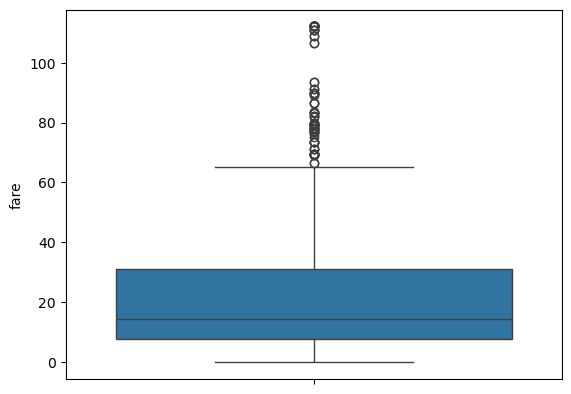

In [18]:
sns.boxplot(y = titanic.fare)

In [19]:
titanic.fare.quantile(0.95)

111.481225

In [21]:
titanic.loc[titanic.fare > titanic.fare.quantile(0.95), 'fare'] = titanic.fare.quantile(0.95)
#plot again and describe again.... 

# Handling missing values

In [22]:
print(titanic.isnull().sum()/len(titanic))

survived       0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
deck           0.772166
embark_town    0.002245
alone          0.000000
dtype: float64


In [23]:
titanic.head(10)

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,True
5,0,male,NaN,0,0,8.4583,Third,NaN,Queenstown,True
6,0,male,54.0,0,0,51.8625,First,E,Southampton,True
7,0,male,2.0,3,1,21.0750,Third,NaN,Southampton,False
8,1,female,27.0,0,2,11.1333,Third,NaN,Southampton,False
9,1,female,14.0,1,0,30.0708,Second,NaN,Cherbourg,False


In [24]:
titanic = titanic.drop('deck', axis =1)

In [25]:
titanic.head(10)

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,False
1,1,female,38.0,1,0,71.2833,First,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,Southampton,True
3,1,female,35.0,1,0,53.1000,First,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,Southampton,True
5,0,male,NaN,0,0,8.4583,Third,Queenstown,True
6,0,male,54.0,0,0,51.8625,First,Southampton,True
7,0,male,2.0,3,1,21.0750,Third,Southampton,False
8,1,female,27.0,0,2,11.1333,Third,Southampton,False
9,1,female,14.0,1,0,30.0708,Second,Cherbourg,False


In [26]:
# replace missings in age with median age
titanic.loc[titanic.age.isnull(), 'age'] = titanic.age.median()

In [27]:
titanic.head(10)

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,False
1,1,female,38.0,1,0,71.2833,First,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,Southampton,True
3,1,female,35.0,1,0,53.1000,First,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,Southampton,True
5,0,male,28.0,0,0,8.4583,Third,Queenstown,True
6,0,male,54.0,0,0,51.8625,First,Southampton,True
7,0,male,2.0,3,1,21.0750,Third,Southampton,False
8,1,female,27.0,0,2,11.1333,Third,Southampton,False
9,1,female,14.0,1,0,30.0708,Second,Cherbourg,False


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          891 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   class        891 non-null    category
 7   embark_town  889 non-null    object  
 8   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(3), object(2)
memory usage: 50.7+ KB


In [29]:
# drops when at least one  outlier
titanic = titanic.dropna()

In [30]:
titanic.head(10)

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,False
1,1,female,38.0,1,0,71.2833,First,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,Southampton,True
3,1,female,35.0,1,0,53.1000,First,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,Southampton,True
5,0,male,28.0,0,0,8.4583,Third,Queenstown,True
6,0,male,54.0,0,0,51.8625,First,Southampton,True
7,0,male,2.0,3,1,21.0750,Third,Southampton,False
8,1,female,27.0,0,2,11.1333,Third,Southampton,False
9,1,female,14.0,1,0,30.0708,Second,Cherbourg,False


# Handling categorical data

In [31]:
titanic.head(3)

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,False
1,1,female,38.0,1,0,71.2833,First,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,Southampton,True


In [32]:
# Handling orderd data // create a Python dictonary
class_categories = {'First':1, 'Second':2, 'Third':3}
titanic['class'] = titanic['class'].apply(lambda x: class_categories[x])

# Handling binary data
columns_binary = ['sex',  'alone']
titanic = pd.get_dummies(titanic, drop_first=True, columns=columns_binary)

# Handling multi-class data
columns_binary = ['embark_town']
titanic = pd.get_dummies(titanic, columns=columns_binary)

In [33]:
titanic.head(10)

,survived,age,sibsp,parch,fare,class,sex_male,alone_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,3,True,False,False,False,True
1,1,38.0,1,0,71.2833,1,False,False,True,False,False
2,1,26.0,0,0,7.9250,3,False,True,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,False,False,True
4,0,35.0,0,0,8.0500,3,True,True,False,False,True
5,0,28.0,0,0,8.4583,3,True,True,False,True,False
6,0,54.0,0,0,51.8625,1,True,True,False,False,True
7,0,2.0,3,1,21.0750,3,True,False,False,False,True
8,1,27.0,0,2,11.1333,3,False,False,False,False,True
9,1,14.0,1,0,30.0708,2,False,False,True,False,False


In [34]:
titanic.to_csv("../data/titanic_clean.csv", index= False)

# Example of scaling

In [35]:
from sklearn import preprocessing
scaled = preprocessing.minmax_scale(X=titanic)
pd.DataFrame(scaled,  columns= titanic.columns).head(3)

,survived,age,sibsp,parch,fare,class,sex_male,alone_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.0,0.271174,0.125,0.0,0.065208,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.472229,0.125,0.0,0.641139,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.000,0.0,0.071279,1.0,0.0,1.0,0.0,0.0,1.0
